In [1]:
import pandas as pd
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/the-office-lines - scripts.csv')
df = df.query('deleted == False')
df = df.drop(['id','line_text','deleted'],axis=1)
df.head(20)

,season,episode,scene,speaker
0,1,1,1,Michael
1,1,1,1,Jim
2,1,1,1,Michael
3,1,1,1,Jim
4,1,1,1,Michael
5,1,1,2,Michael
6,1,1,3,Michael
7,1,1,3,Pam
8,1,1,3,Michael
9,1,1,3,Pam


In [55]:
def plotSeasonConvosWOInterviews(season):
    s = df.query('season == ' + season)
    num_eps = len(s['episode'].unique())

s = df.query('season == ' + '1')
num_eps = len(s['episode'].unique())

g = s.groupby(['episode','scene'])

convos = []
eps = s.groupby(['episode'])
for i in range(num_eps):
    num_scenes = eps.get_group(i+1)['scene'].unique()
    for j in num_scenes:
        speakers = g.get_group((i+1,j))['speaker'].unique()
        if len(speakers) == 1:
            convos.append(speakers)
s = pd.DataFrame(convos,columns=['speaker'])
s.head()
val = s.groupby('speaker').count()
plt.title('Season' + season +'(Most Interviews)')
ax = val['speaker'].nlargest(20).plot(kind='bar', figsize=(10,7), fontsize=13)

interviews = [] 
for i in g.groups.keys():
    interviews.append([i,g.get_group(i)['speaker'].count()])
interviews = pd.DataFrame(interviews,columns=['Speaker','Interview Counts'])
interviews['Interview Counts'].nlargest(20).plot(x='Speaker',
                y='Interview Counts',
                kind='bar',
                figsize=(10,7),
                fontsize=13,
                title='Season ' + season +' (Most Interviews)',
                legend=False)

NameError: name 'season' is not defined

In [53]:
plotSeasonConvosWOInterviews('1')

KeyError: 'speaker'

In [5]:
plotSeasonConvosWOInterviews('2')

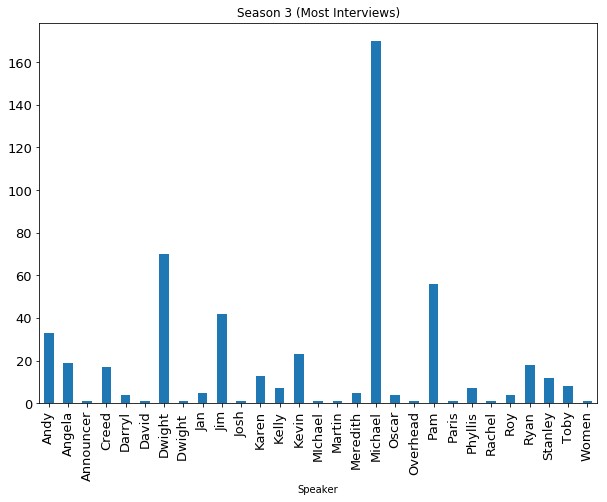

In [33]:
plotSeasonConvosWOInterviews('3')

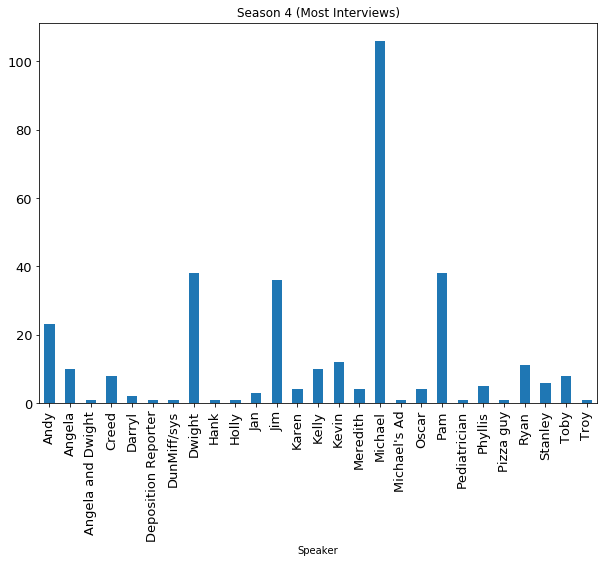

In [34]:
plotSeasonConvosWOInterviews('4')

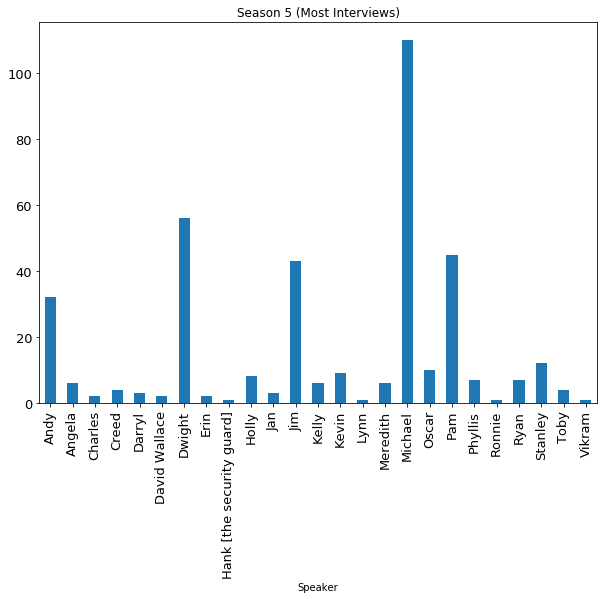

In [35]:
plotSeasonConvosWOInterviews('5')

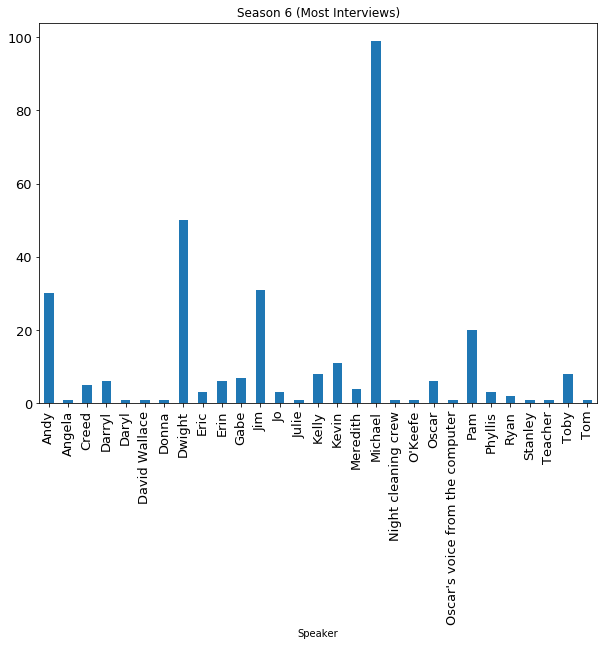

In [36]:
plotSeasonConvosWOInterviews('6')

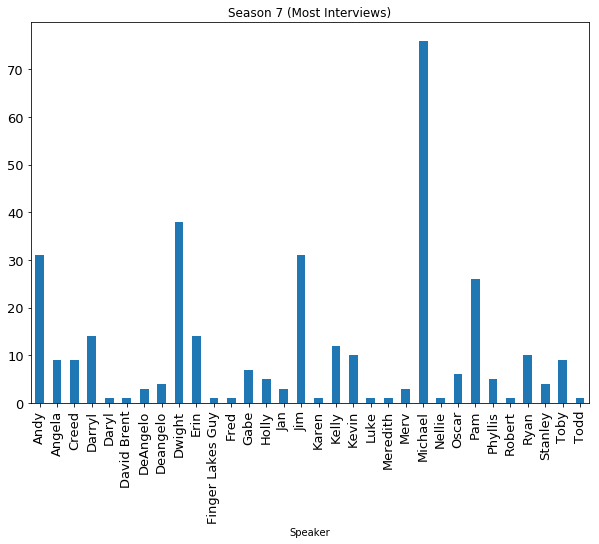

In [37]:
plotSeasonConvosWOInterviews('7')

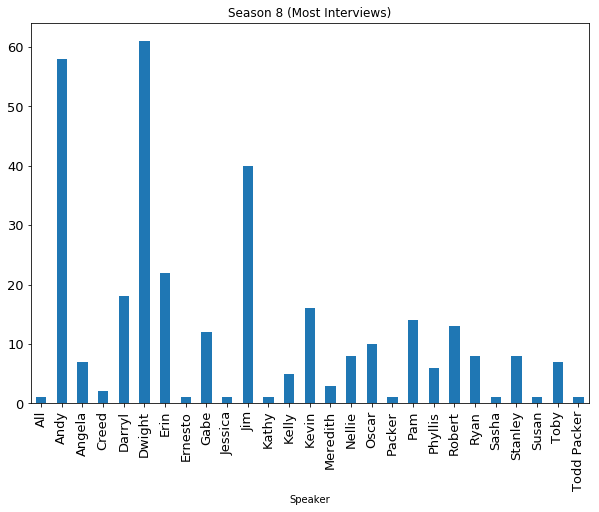

In [38]:
plotSeasonConvosWOInterviews('8')

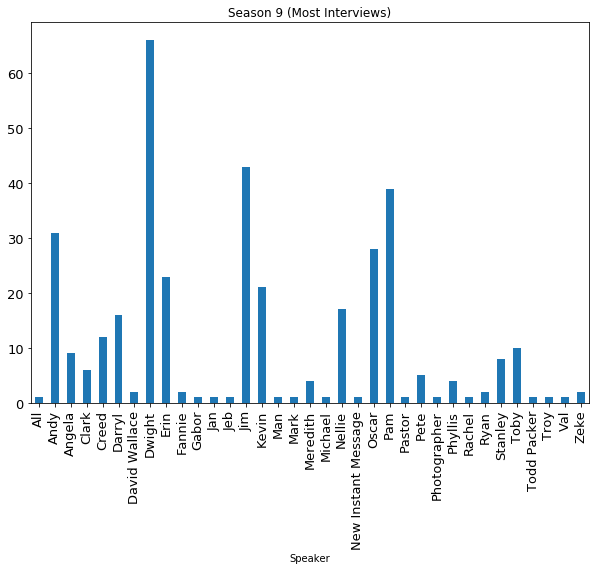

In [39]:
plotSeasonConvosWOInterviews('9')